<a href="https://colab.research.google.com/github/danielrafiqueUtoronto/TechXplore2021zoomgrammers/blob/main/TechXplore_Zoomgrammers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning program that predicts the closing price of bitcoin
Dataset: https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv

In [ ]:
import pandas as pd # the 'core' framework for data analysis
import numpy as np  # necessary for tensorflow models
import matplotlib.pyplot as plt # plot simple graphs/charts 
import seaborn as sns # Data visualization library 

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving coin_Bitcoin.csv to coin_Bitcoin (1).csv


In [ ]:
df = pd.read_csv('coin_Bitcoin.csv')

In [ ]:
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2862 non-null   int64  
 1   Name       2862 non-null   object 
 2   Symbol     2862 non-null   object 
 3   Date       2862 non-null   object 
 4   High       2862 non-null   float64
 5   Low        2862 non-null   float64
 6   Open       2862 non-null   float64
 7   Close      2862 non-null   float64
 8   Volume     2862 non-null   float64
 9   Marketcap  2862 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 223.7+ KB


In [ ]:
df.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

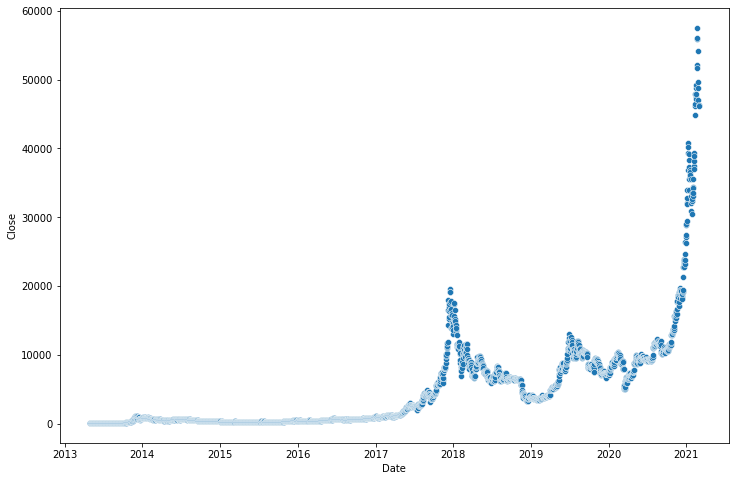

In [ ]:
# Date vs Marketcap
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Date', y = 'Close', data = df)

In [ ]:
df = df.drop('SNo', axis = 1) # drop along the columns
df = df.drop('Name', axis = 1) # drop along the columns 
df = df.drop('Symbol', axis = 1) # drop along the columns 
df = df.drop('Volume', axis = 1) # drop along the columns 
df.head()

,Date,High,Low,Open,Close,Marketcap,month,year
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,1.603769e+09,4,2013
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,1.542813e+09,4,2013
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,1.298955e+09,5,2013
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,1.168517e+09,5,2013
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,1.085995e+09,5,2013


In [ ]:
df['Date'] = pd.to_datetime(df['Date']) # add new columns for the date and months 
df['month'] = df['Date'].apply(lambda date:date.month)
df['year'] = df['Date'].apply(lambda date:date.year)

df.head()

,Date,High,Low,Open,Close,Marketcap,month,year
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,1.603769e+09,4,2013
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,1.542813e+09,4,2013
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,1.298955e+09,5,2013
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,1.168517e+09,5,2013
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,1.085995e+09,5,2013


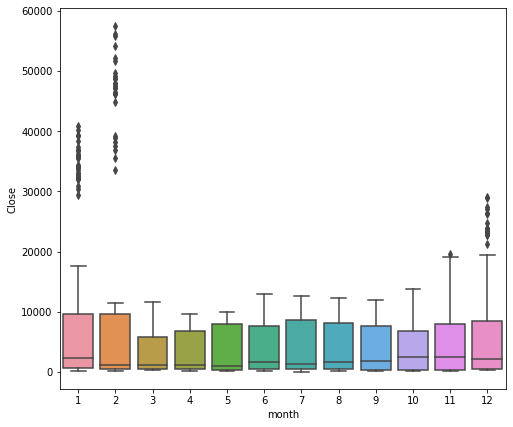

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x='month', y = 'Close', data=df) 

In [ ]:
df = df.drop('Marketcap', axis = 1) # drop along the columns 
df

,Date,High,Low,Open,Close,month,year
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,4,2013
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,4,2013
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,5,2013
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,5,2013
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,5,2013
...,...,...,...,...,...,...,...
2857,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,2,2021
2858,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,2,2021
2859,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,2,2021
2860,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,2,2021


In [ ]:
df['day'] = df['Date'].apply(lambda date:date.day)
df

,Date,High,Low,Open,Close,month,year,day
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,4,2013,29
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,4,2013,30
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,5,2013,1
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,5,2013,2
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,5,2013,3
...,...,...,...,...,...,...,...,...
2857,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,2,2021,23
2858,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,2,2021,24
2859,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,2,2021,25
2860,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,2,2021,26


In [ ]:
df = df.drop('Date', axis = 1) # drop along the columns 
df

,High,Low,Open,Close,month,year,day
0,147.488007,134.000000,134.444000,144.539993,4,2013,29
1,146.929993,134.050003,144.000000,139.000000,4,2013,30
2,139.889999,107.720001,139.000000,116.989998,5,2013,1
3,125.599998,92.281898,116.379997,105.209999,5,2013,2
4,108.127998,79.099998,106.250000,97.750000,5,2013,3
...,...,...,...,...,...,...,...
2857,54204.929756,45290.590268,54204.929756,48824.426869,2,2021,23
2858,51290.136695,47213.498162,48835.087661,49705.333316,2,2021,24
2859,51948.966982,47093.853019,49709.082425,47093.853019,2,2021,25
2860,48370.785260,44454.842114,47180.464054,46339.760083,2,2021,26



# Test/Train Split

In [ ]:
X = df.drop('Close', axis=1) # exluding the close column that our model will predict
y = df['Close'] # what our model will predict

In [ ]:
# import a built-in function called "train_test_split" from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Scaling

In [ ]:
 #importing  built-in function called MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train) # fit and transforming our train set simultaneously
X_test = scaler.transform(X_test) # only transforming our test set

# Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train.shape, X_test.shape # checking the input shape

((2003, 6), (859, 6))

In [ ]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

# compiling with Adam optimizer
# choosing mean-squared error as the loss metric for the regression model 
model.compile(optimizer='adam',loss='mse')  

In [ ]:
# Checking the model summary
model.build(X_train.shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (2003, 19)                133       
_________________________________________________________________
dense_6 (Dense)              (2003, 19)                380       
_________________________________________________________________
dense_7 (Dense)              (2003, 19)                380       
_________________________________________________________________
dense_8 (Dense)              (2003, 19)                380       
_________________________________________________________________
dense_9 (Dense)              (2003, 1)                 20        
Total params: 1,293
Trainable params: 1,293
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

#Training the model

In [ ]:
model.fit(x=X_train,
          y=y_train.values,   # y_train.values instead of y_train to pass in a numpy array
          validation_data=(X_test,y_test.values),
          batch_size=128,
          epochs=400,
          callbacks=[early_stop])

Epoch 1/400
16/16 [==============================] - 1s 20ms/step - loss: 76093422.5882 - val_loss: 63006576.0000
Epoch 2/400
16/16 [==============================] - 0s 6ms/step - loss: 74806292.0000 - val_loss: 63002288.0000
Epoch 3/400
16/16 [==============================] - 0s 7ms/step - loss: 77517293.6471 - val_loss: 62993720.0000
Epoch 4/400
16/16 [==============================] - 0s 7ms/step - loss: 74138594.3529 - val_loss: 62976348.0000
Epoch 5/400
16/16 [==============================] - 0s 7ms/step - loss: 71880652.2353 - val_loss: 62940552.0000
Epoch 6/400
16/16 [==============================] - 0s 6ms/step - loss: 77529203.2941 - val_loss: 62866468.0000
Epoch 7/400
16/16 [==============================] - 0s 7ms/step - loss: 82810858.3529 - val_loss: 62717660.0000
Epoch 8/400
16/16 [==============================] - 0s 5ms/step - loss: 71616329.4118 - val_loss: 62443072.0000
Epoch 9/400
16/16 [==============================] - 0s 6ms/step - loss: 77493881.1765 - val_lo

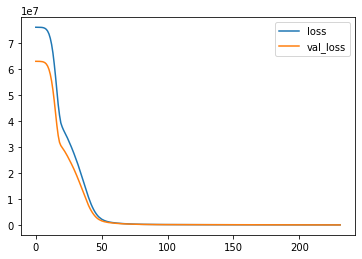

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluation of the model

In [ ]:
# For regression problems, r2 score is commonly used for the evaluation
from sklearn.metrics import r2_score

In [ ]:
# predicting with test dataset
predictions = model.predict(X_test)

In [ ]:
print(r2_score(y_test.values, predictions))

0.9980467454830511


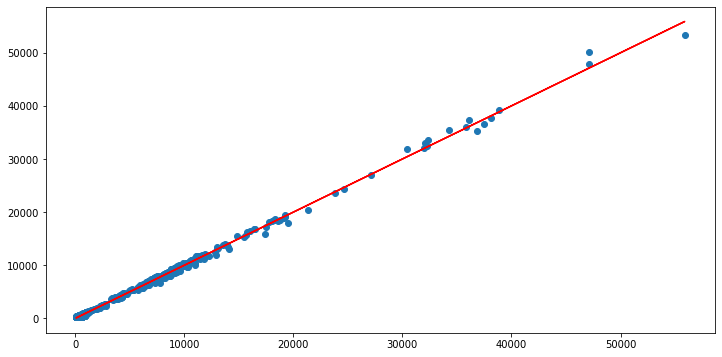

In [ ]:
# Visualization...

plt.figure(figsize=(12, 6))

# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


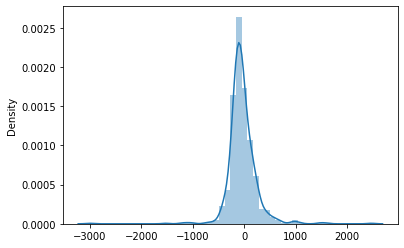

In [ ]:
errors = y_test.values.reshape(859, 1) - predictions
sns.distplot(errors)

# Demo

In [ ]:
demo_closing = df.drop('Close',axis=1).iloc[2000]
demo_closing = scaler.transform(demo_closing.values.reshape(-1, 6))

In [ ]:
model.predict(demo_closing), df.iloc[2000]['Close']

(array([[6463.4688]], dtype=float32), 6489.19)